In [1]:
from src.image_utils import load_nii, get_nii_as_list, get_windowed_image
from src.curvelet_sst import Synchrosqueezer
from src.experiments import execute_experiment, ExperimentConfig, SynchrosqueezedResult
from src.experiments.exp_config import experiments

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
filename = "datasets/computed-tomography/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/075.nii"

nii = load_nii(filename)
nii_list = get_nii_as_list(nii)

filename_mask = filename.replace("ct_scans", "masks")
nii_mask = load_nii(filename_mask)
nii_mask_list = get_nii_as_list(nii_mask)


In [3]:
winners = [
    "Threshold Coefficients at 0.001",
    "Exponential Scale Mask with decay_rate=0.01",
    "Highpass Mask with cutoff_scale=10",
    "Gaussian Scale Mask with center_scale=N/2, sigma=1.0",
    "Bandpass Mask with low_scale=5, high_scale=10",
    "Enhance Energy by 10",
]

In [4]:
experiments = [exp for exp in experiments if exp.name in winners]

In [5]:
indexes = []
for i, msk in enumerate(nii_mask_list):
    if msk.sum() > 0:
        indexes.append(i)

index = indexes[len(indexes)//2]
print(index)

23


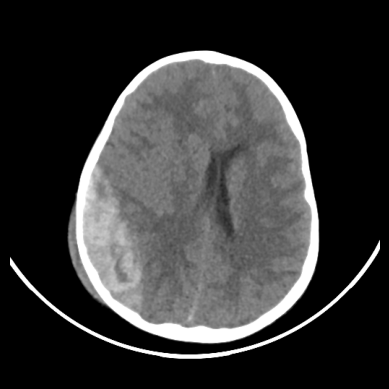

In [6]:
img, _ = get_windowed_image(nii_list[index])
img = np.rot90(img)

plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

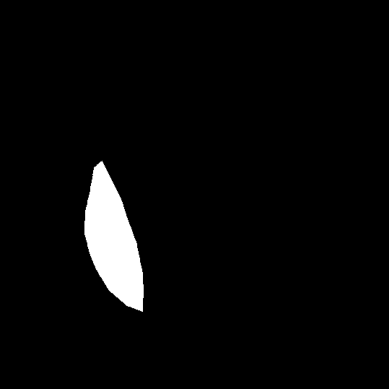

In [7]:
msk = (nii_mask_list[index])
msk = np.rot90(msk)
plt.imshow(msk, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
import logging

def improve(img: np.ndarray, exp: ExperimentConfig):
    logging.info(f"Starting Synchrosqueezer for experiment: {exp.name}")
    ssq = Synchrosqueezer()

    logging.info("Performing synchrosqueezed curvelet transform...")
    ssq_result = ssq.synchrosqueezed_curvelet_transform(img)
    ssq_result = SynchrosqueezedResult(*ssq_result) # type: ignore

    logging.info("Executing experiment...")
    improved = execute_experiment(exp, ssq_result, img.shape, ssq)

    logging.info("Experiment completed.")
    return improved

In [9]:
def show_comparison(img: np.ndarray, mask: np.ndarray, exp: ExperimentConfig):
    improved = improve(img, exp)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='white')
    plt.rcParams.update({'font.family': 'Times New Roman', 'text.color': 'black', 'axes.labelcolor': 'black', 'axes.edgecolor': 'black', 'axes.titlecolor': 'black'})

    # 1. Imagen original
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("a)", fontsize=18, color='black', fontname='Times New Roman')
    axs[0].axis("off")
    axs[0].set_facecolor('white')

    # 2. Imagen mejorada
    axs[1].imshow(improved, cmap="gray")
    axs[1].set_title("b)", fontsize=18, color='black', fontname='Times New Roman')
    axs[1].axis("off")
    axs[1].set_facecolor('white')

    # 3. Imagen mejorada + polígono de la máscara
    axs[2].imshow(improved, cmap="gray")
    axs[2].set_title("c)", fontsize=18, color='black', fontname='Times New Roman')
    axs[2].axis("off")
    axs[2].set_facecolor('white')

    # Encontrar contornos en la máscara
    mask_uint8 = (mask > 0).astype(np.uint8)
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        cnt = cnt.squeeze()
        if cnt.ndim == 2:
            axs[2].plot(cnt[:, 0], cnt[:, 1], color='red', linewidth=2)

    plt.tight_layout()
    plt.show()

In [10]:
experiments

[ExperimentConfig(name='Threshold Coefficients at 0.001', function=<function threshold_coefficients at 0x000001E2AD3745E0>, params=<function <lambda> at 0x000001E2AD374AE0>, args=(), kwargs={'threshold': 0.001}),
 ExperimentConfig(name='Enhance Energy by 10', function=<function enhance_energy at 0x000001E2AD374680>, params=<function <lambda> at 0x000001E2AD374CC0>, args=(), kwargs={'enhancement_factor': 10}),
 ExperimentConfig(name='Highpass Mask with cutoff_scale=10', function=<function mask_frequency_bands at 0x000001E2AD3747C0>, params=<function <lambda> at 0x000001E2AD374E00>, args=(), kwargs={}),
 ExperimentConfig(name='Bandpass Mask with low_scale=5, high_scale=10', function=<function mask_frequency_bands at 0x000001E2AD3747C0>, params=<function <lambda> at 0x000001E2AD374EA0>, args=(), kwargs={}),
 ExperimentConfig(name='Gaussian Scale Mask with center_scale=N/2, sigma=1.0', function=<function mask_frequency_bands at 0x000001E2AD3747C0>, params=<function <lambda> at 0x000001E2AD

R_low <= wedge_length_coarse, set R_low = 0.


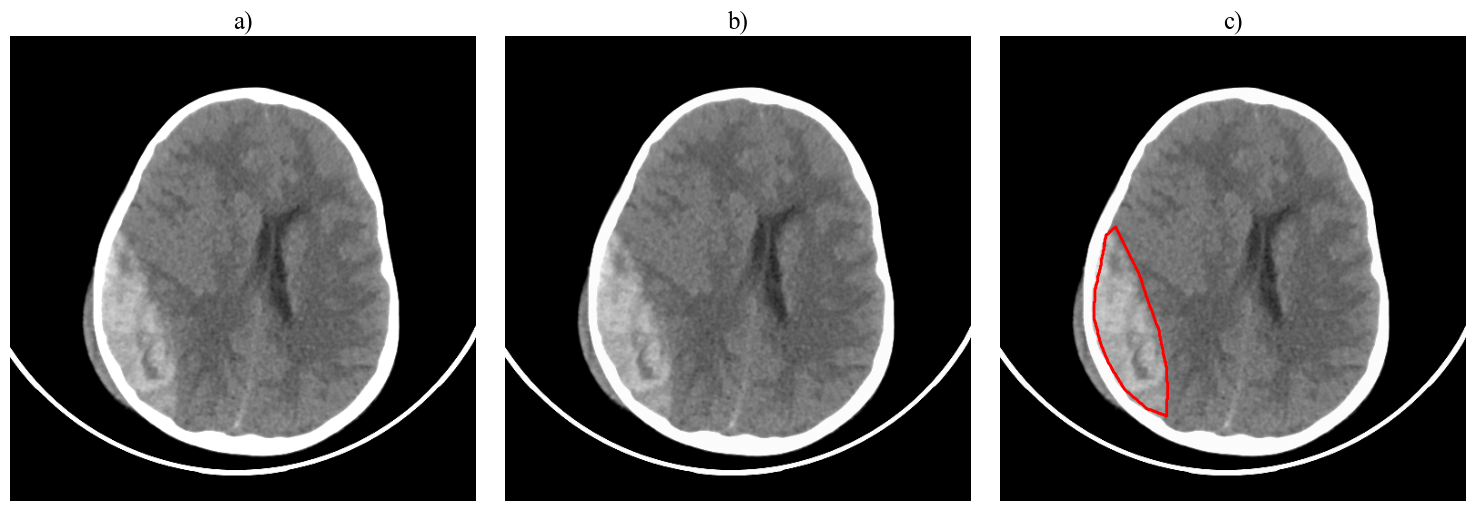

In [11]:
show_comparison(img, msk, experiments[0])

ERROR:root:The dtype is float32


R_low <= wedge_length_coarse, set R_low = 0.


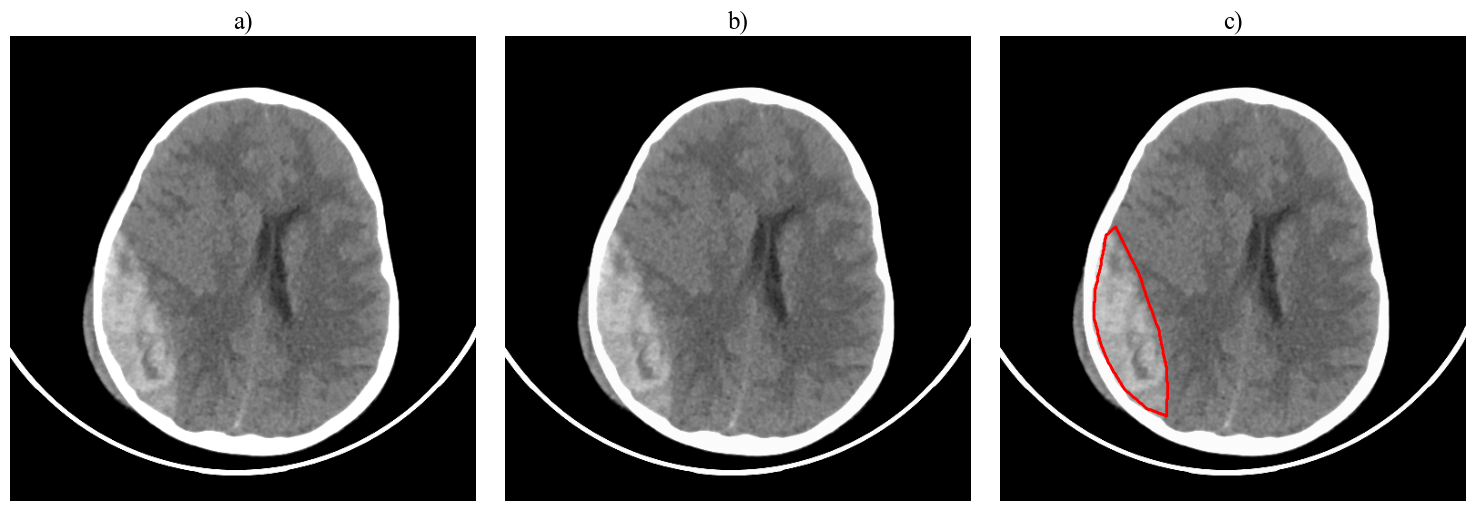

In [12]:
show_comparison(img, msk, experiments[1])

R_low <= wedge_length_coarse, set R_low = 0.


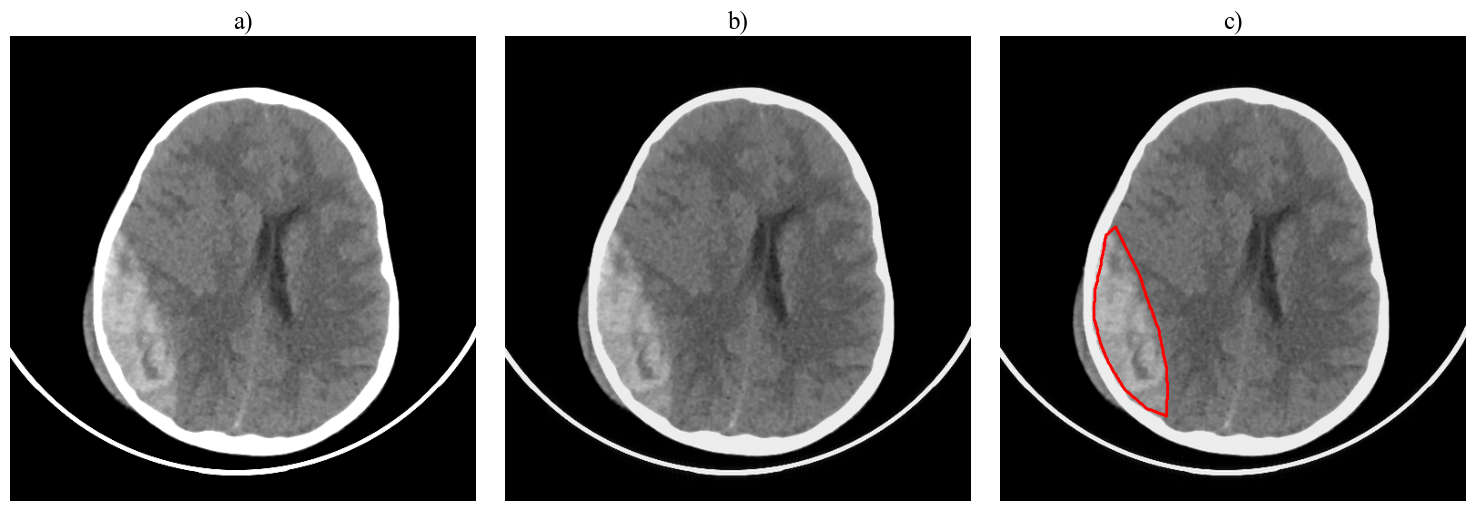

In [13]:
show_comparison(img, msk, experiments[2])

R_low <= wedge_length_coarse, set R_low = 0.


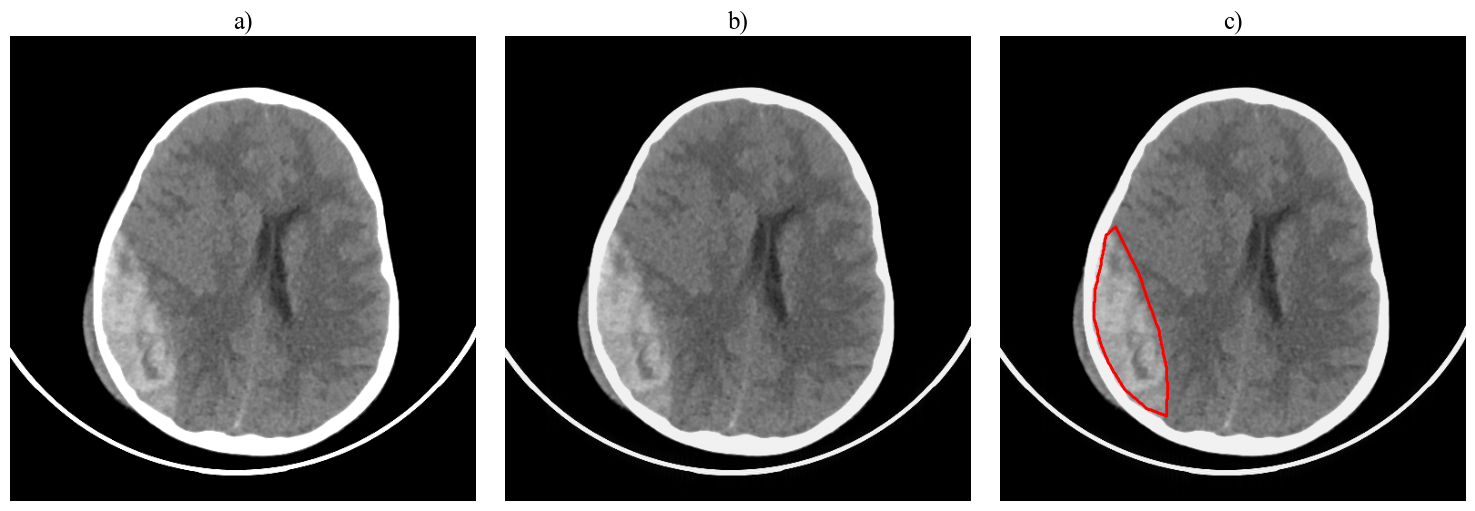

In [14]:
show_comparison(img, msk, experiments[3])

R_low <= wedge_length_coarse, set R_low = 0.


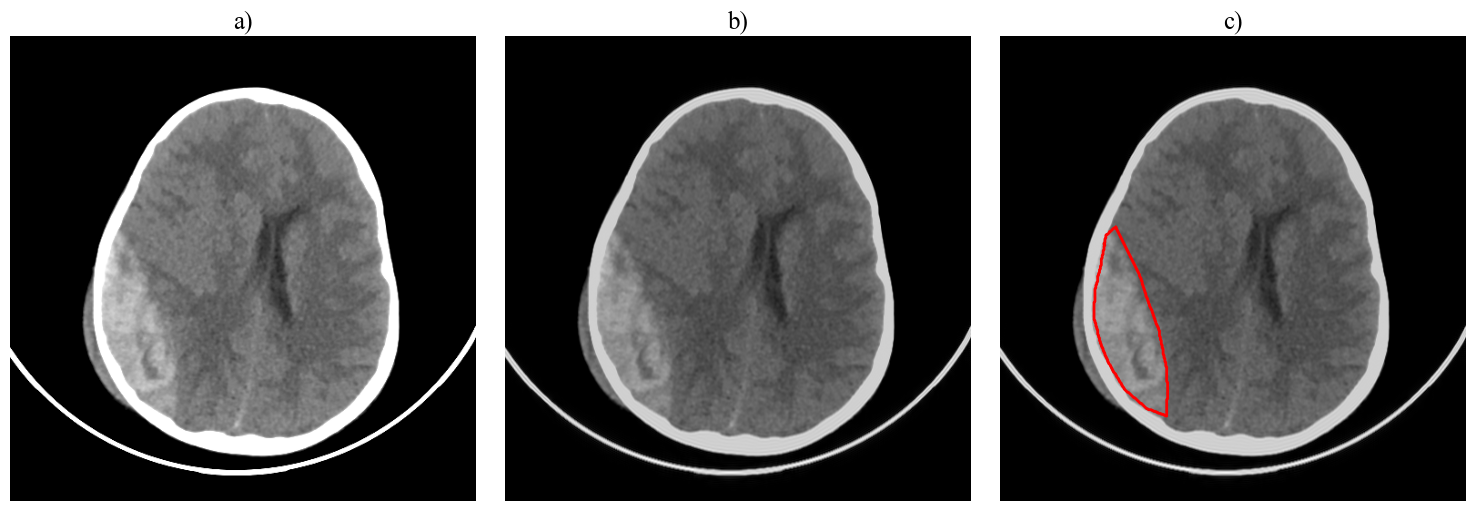

In [15]:
show_comparison(img, msk, experiments[4])

R_low <= wedge_length_coarse, set R_low = 0.


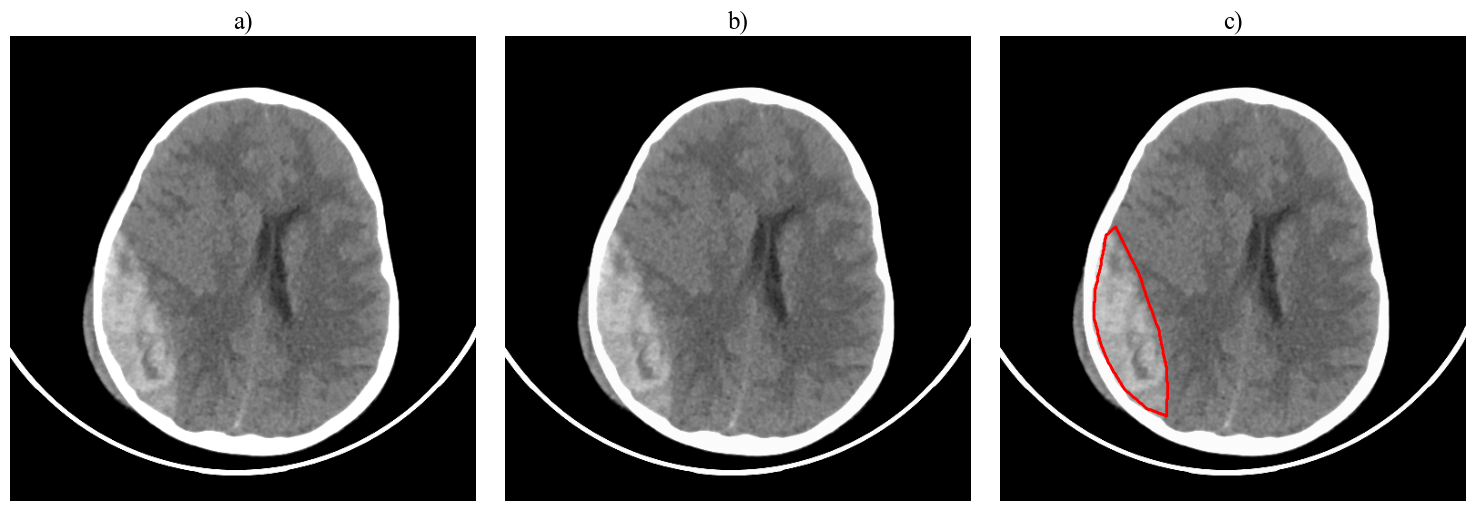

In [16]:
show_comparison(img, msk, experiments[5])